<a href="https://colab.research.google.com/github/qurainisepty/portfolio/blob/main/Student_Mental_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.miscmodels.ordinal_model as om
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
df = pd.read_csv('MentalHealthSurvey.csv')
df

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,4-6 hrs,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,4-6 hrs,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,2-4 hrs,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,4-6 hrs,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,4-6 hrs,3,5,5,2,3,5,5,4,4,Online Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,7-8 hrs,4,3,1,4,4,2,3,1,2,"Online Entertainment, Outdoor Activities, Sleep"
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,2-4 hrs,5,5,5,5,1,5,5,5,5,"Religious Activities, Sleep"
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,4-6 hrs,5,4,2,4,3,1,2,1,1,"Religious Activities, Sports and Fitness, Soci..."
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,4-6 hrs,3,3,3,3,2,3,4,4,5,Sleep


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [4]:
df.nunique()

,0
gender,2
age,8
university,9
degree_level,2
degree_major,4
academic_year,4
cgpa,6
residential_status,2
campus_discrimination,2
sports_engagement,4


In [5]:
df.isna().sum()

,0
gender,0
age,0
university,0
degree_level,0
degree_major,0
academic_year,0
cgpa,0
residential_status,0
campus_discrimination,0
sports_engagement,0


## **EXPLORATORY DATA ANALYSIS**

<ipython-input-6-2546c6467b48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='depression', y='university', data=df_sorted, palette='viridis')


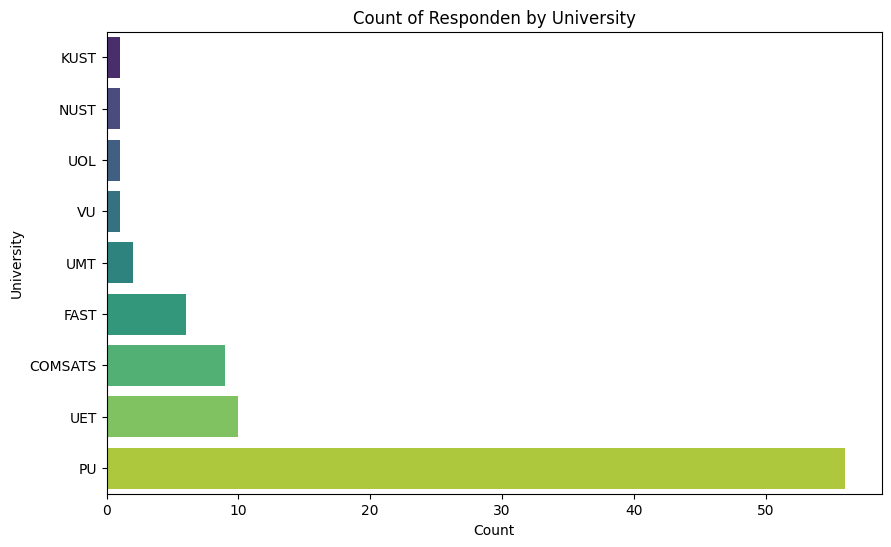

In [6]:
# Sort respondents from universities
df_sorted = df.groupby('university')['depression'].count().sort_values().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='depression', y='university', data=df_sorted, palette='viridis')
plt.xlabel('Count')
plt.ylabel('University')
plt.title('Count of Responden by University')
plt.show()

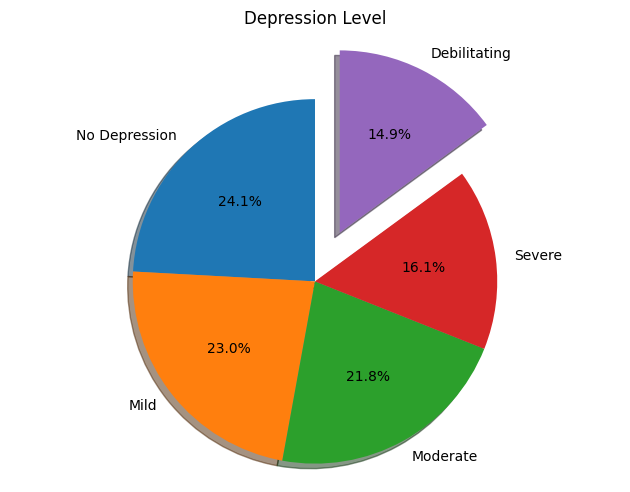

In [7]:
# Pie chart for depression level
sizes = df['depression'].value_counts(sort = True)
explode = (0, 0, 0, 0, 0.3)
fig1, ax1 = plt.subplots()
labels = "No Depression", "Mild", "Moderate", "Severe", "Debilitating"
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Depression Level")
plt.show()

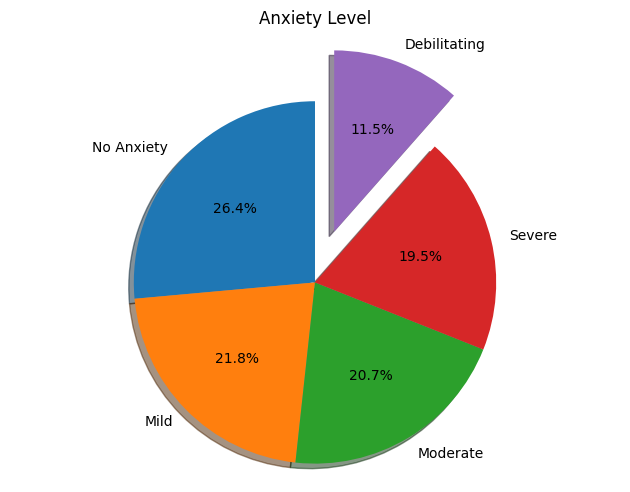

In [8]:
# Pie chart for anxiety level
sizes = df['anxiety'].value_counts(sort = True)
explode = (0, 0, 0, 0, 0.3)
fig1, ax1 = plt.subplots()
labels = "No Anxiety", "Mild", "Moderate", "Severe", "Debilitating"
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Anxiety Level")
plt.show()

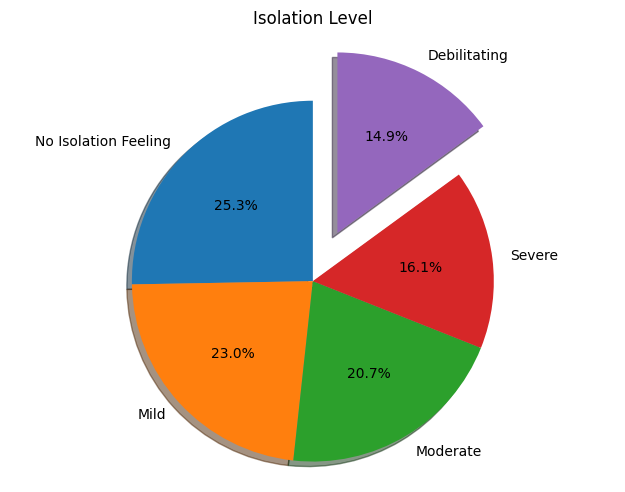

In [9]:
# Pie chart for feeling isolatin level
sizes = df['isolation'].value_counts(sort = True)
explode = (0, 0, 0, 0, 0.3)
fig1, ax1 = plt.subplots()
labels = "No Isolation Feeling", "Mild", "Moderate", "Severe", "Debilitating"
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Isolation Level")
plt.show()

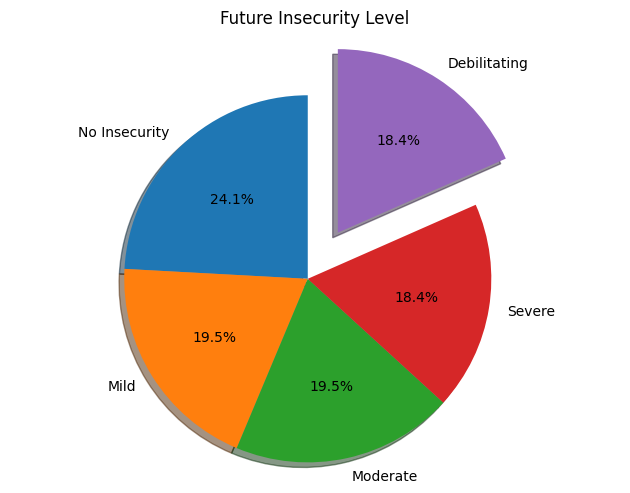

In [10]:
# Pie chart for future insecurity level
sizes = df['future_insecurity'].value_counts(sort = True)
explode = (0, 0, 0, 0, 0.3)
fig1, ax1 = plt.subplots()
labels = "No Insecurity", "Mild", "Moderate", "Severe", "Debilitating"
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Future Insecurity Level")
plt.show()

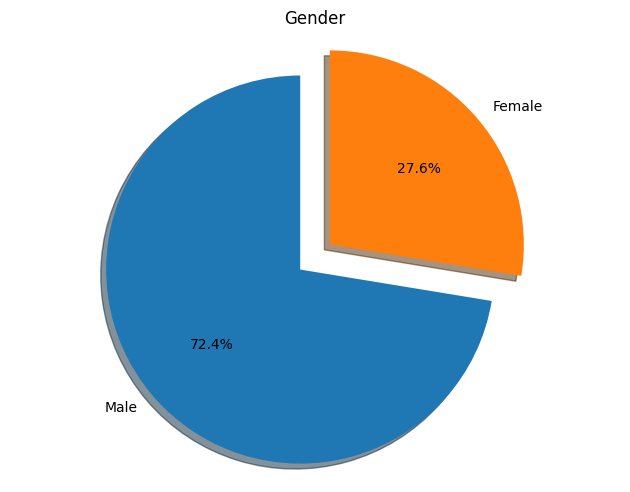

In [11]:
# Pie chart for gender
sizes = df['gender'].value_counts(sort = True)
explode = (0, 0.2)
fig1, ax1 = plt.subplots()
labels = "Male", "Female"
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title("Gender")
plt.show()

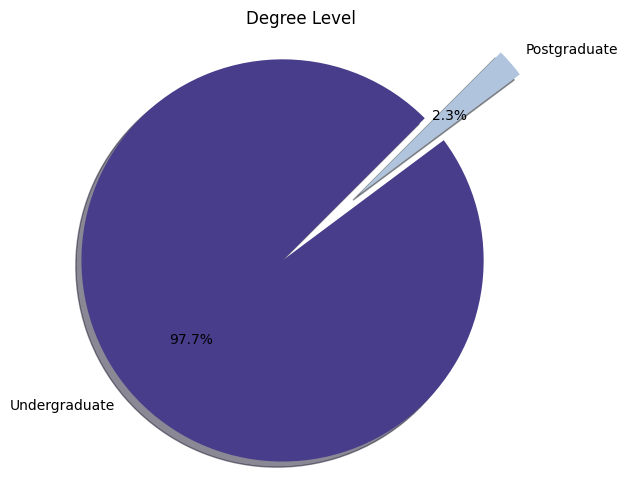

In [12]:
# Pie chart for degree level
sizes = df['degree_level'].value_counts(sort = True)
explode = (0, 0.5)
fig1, ax1 = plt.subplots()
labels = "Undergraduate", "Postgraduate"
colors = ['lightblue', 'lightcoral'] # Example colors
ax1.pie(sizes, explode=explode, labels=labels, colors= ['darkslateblue','lightsteelblue'], autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')
plt.tight_layout()
plt.title("Degree Level")
plt.show()

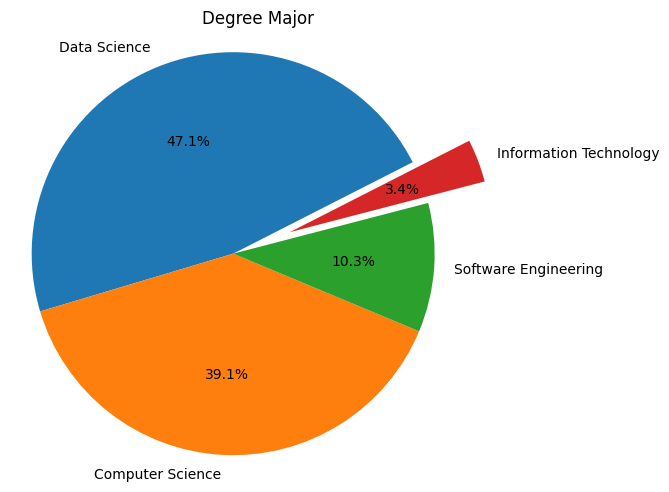

In [13]:
# Pie chart for degree major
sizes = df['degree_major'].value_counts(sort = True)
explode = (0, 0, 0, 0.3)
fig1, ax1 = plt.subplots()
labels = df['degree_major'].unique()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=27)
ax1.axis('equal')
plt.tight_layout()
plt.title("Degree Major")
plt.show()

<ipython-input-14-b8953905fe41>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sports_engagement', y='depression', data=df_sorted, palette="rocket")


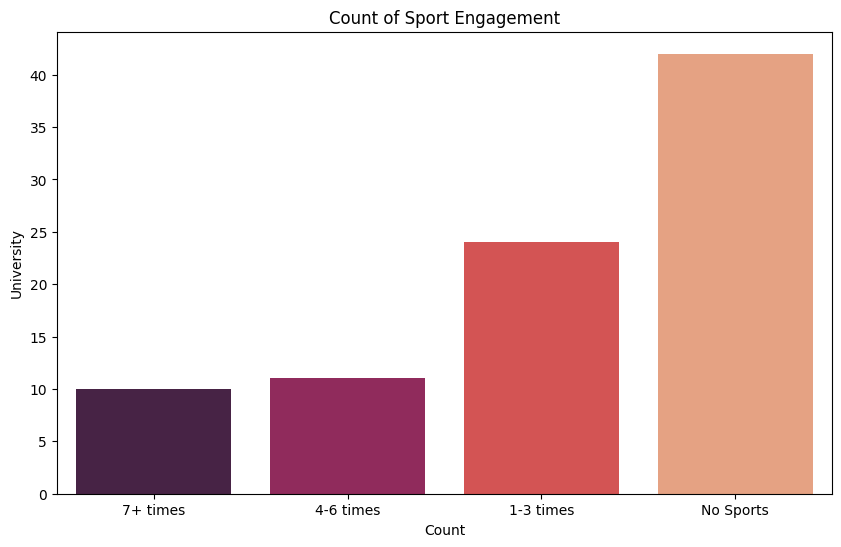

In [14]:
# Bar chart for sports engagement
df_sorted = df.groupby('sports_engagement')['depression'].count().sort_values().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='sports_engagement', y='depression', data=df_sorted, palette="rocket")
plt.xlabel('Count')
plt.ylabel('University')
plt.title('Count of Sport Engagement')
plt.show()

<ipython-input-15-f74943b94e58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='depression', y='stress_relief_activities', data=df_sorted, palette="magma")


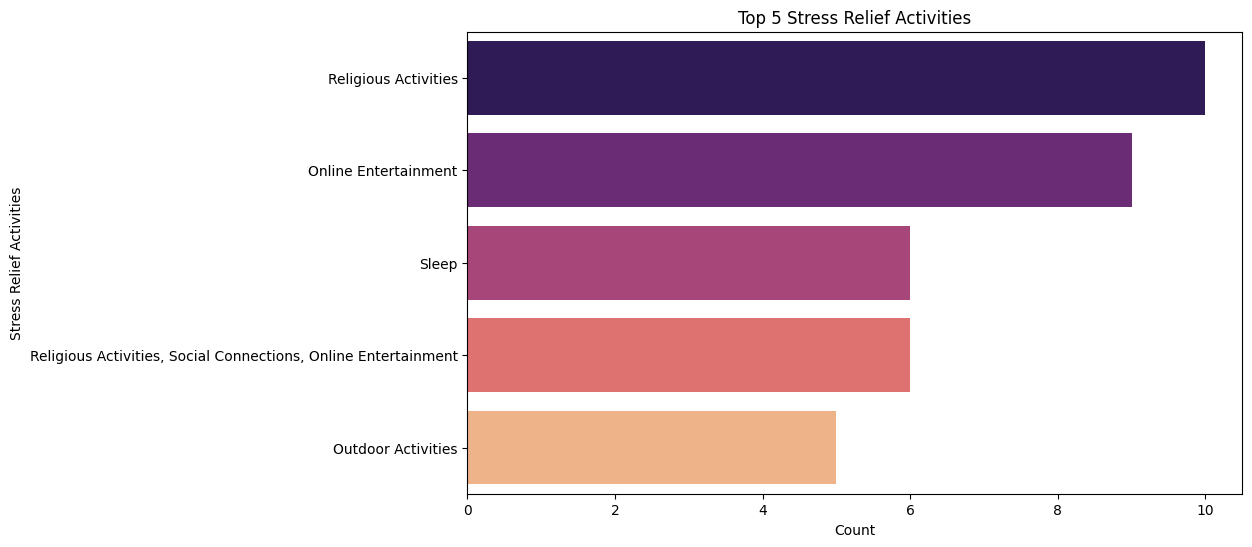

In [15]:
# Top 5 Stress Relief Activities
df_sorted = df.groupby('stress_relief_activities')['depression'].count().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='depression', y='stress_relief_activities', data=df_sorted, palette="magma")
plt.xlabel('Count')
plt.ylabel('Stress Relief Activities')
plt.title('Top 5 Stress Relief Activities')
plt.show()

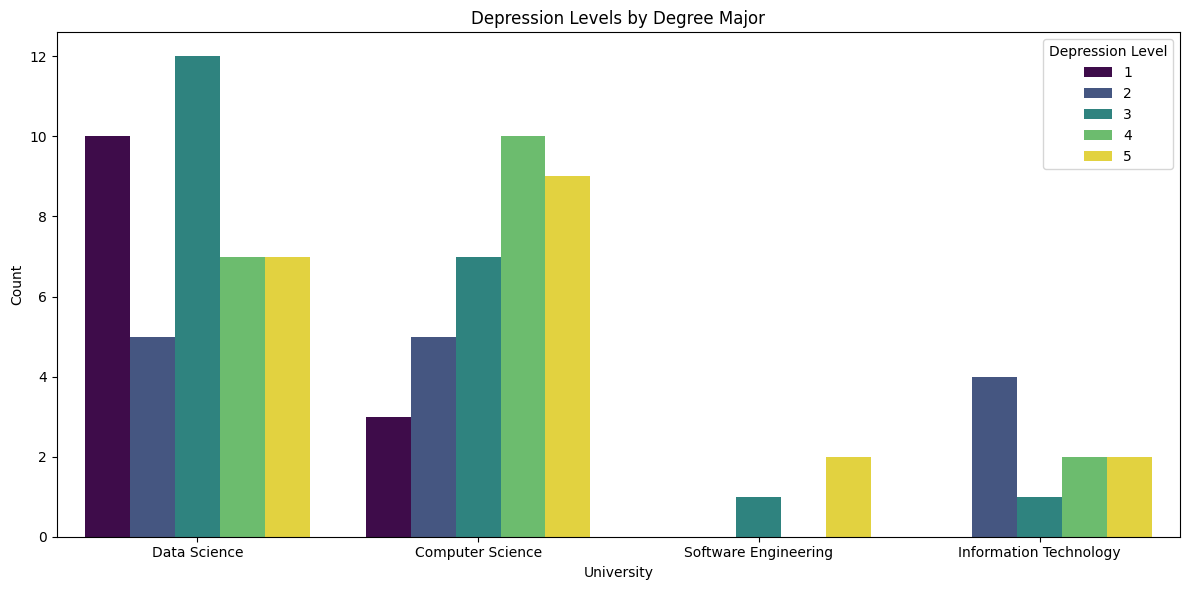

In [16]:
# Grouped bar plot Degree Major
plt.figure(figsize=(12, 6))
sns.countplot(x= 'degree_major', hue='depression', data=df, palette='viridis')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Depression Levels by Degree Major')
plt.xticks(ha='center')
plt.legend(title='Depression Level')
plt.tight_layout()
plt.show()

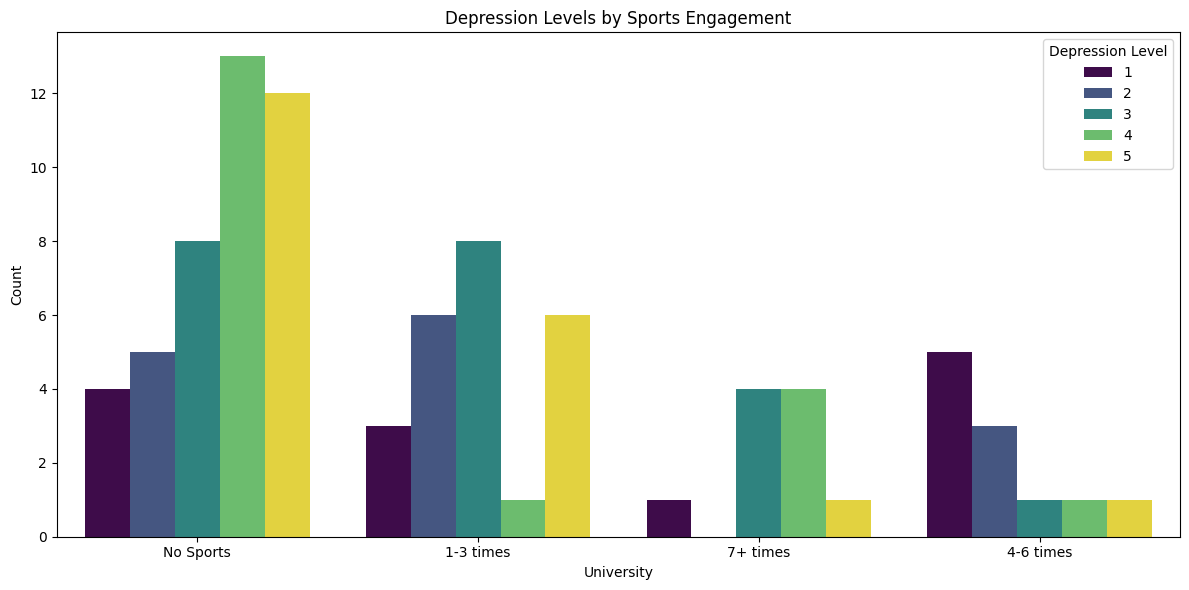

In [17]:
# Grouped bar plot Sports Engagement
plt.figure(figsize=(12, 6))
sns.countplot(x= 'sports_engagement', hue='depression', data=df, palette='viridis')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Depression Levels by Sports Engagement')
plt.xticks(ha='center')
plt.legend(title='Depression Level')
plt.tight_layout()
plt.show()

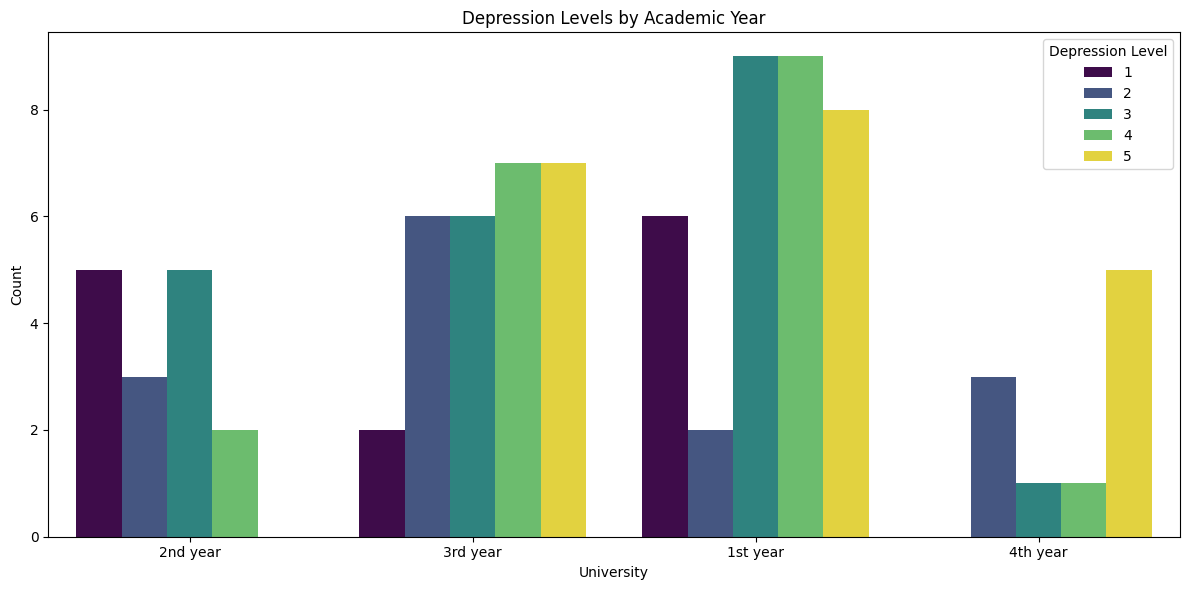

In [18]:
# Grouped bar plot academic year
plt.figure(figsize=(12, 6))
sns.countplot(x='academic_year', hue='depression', data=df, palette='viridis')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Depression Levels by Academic Year')
plt.xticks(ha='center')
plt.legend(title='Depression Level')
plt.tight_layout()
plt.show()

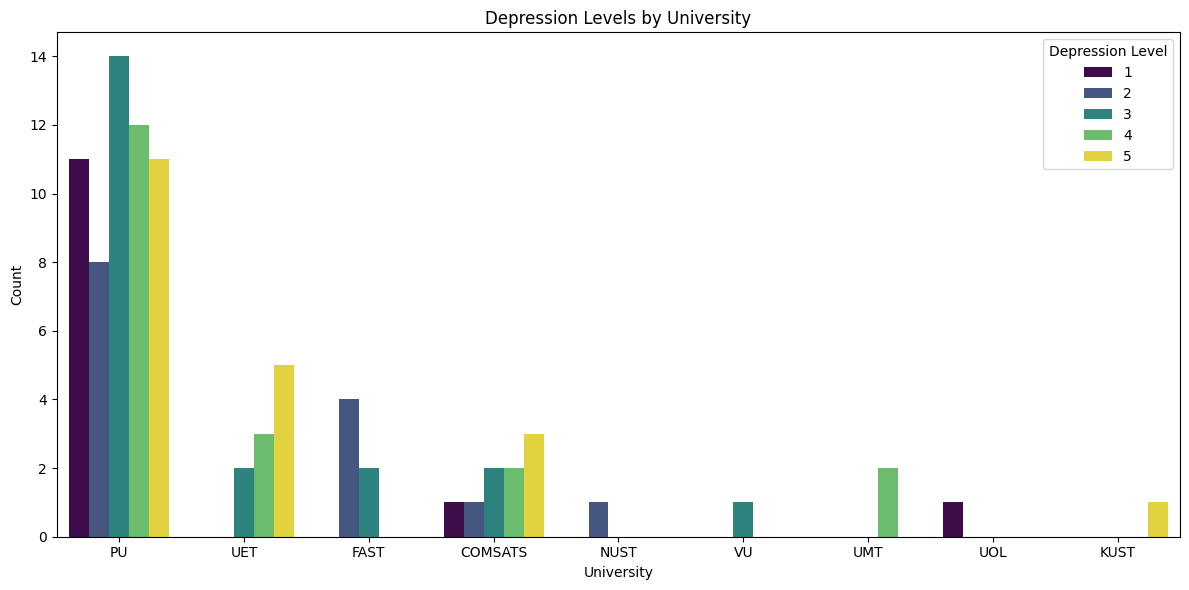

In [19]:
# Grouped bar plot university
plt.figure(figsize=(12, 6))
sns.countplot(x='university', hue='depression', data=df, palette='viridis')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Depression Levels by University')
plt.xticks( ha='center')
plt.legend(title='Depression Level')
plt.tight_layout()
plt.show()

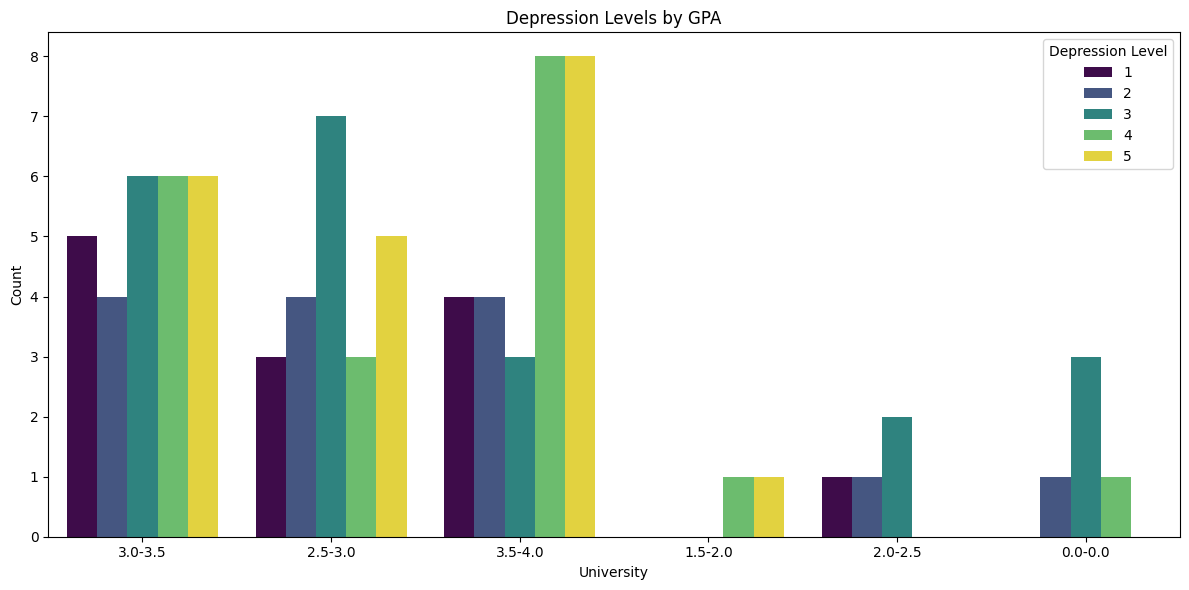

In [20]:
# Grouped bar plot GPA
plt.figure(figsize=(12, 6))
sns.countplot(x= 'cgpa', hue='depression', data=df, palette='viridis')
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Depression Levels by GPA')
plt.xticks(ha='center')
plt.legend(title='Depression Level')
plt.tight_layout()
plt.show()

### **ENCODING DATA**

In [21]:
df_en = df.copy()

# Encoding Data Gender
replace1 = ['Male','Female']
replacement1 = [0, 1]
df_en = df.copy()
df_en['gender'].replace(replace1, replacement1, inplace = True)

# Encoding Data Degree Level
replace2 = ['Undergraduate','Postgraduate']
replacement2 = [0, 1]
df_en['degree_level'].replace(replace2, replacement2, inplace = True)

# Encoding Data Degree Major
replace3 = ['Software Engineering', 'Information Technology','Computer Science', 'Data Science']
replacement3 = [0, 1, 2, 3]
df_en['degree_major'].replace(replace3, replacement3, inplace = True)

# Encoding Data Sports Engagement
replace3 = ['No Sports', '1-3 times', '4-6 times', '7+ times']
replacement3 = [0, 1, 2, 3]
df_en['degree_major'].replace(replace3, replacement3, inplace = True)

# Encoding Data Campus Discrimination
replace4 = ['No', 'Yes']
replacement4 = [0, 1]
df_en['campus_discrimination'].replace(replace4, replacement4, inplace = True)

# Encoding Data Average Sleep
replace5 = ['2-4 hrs','4-6 hrs', '7-8 hrs']
replacement5 = [0, 1, 2]
df_en['average_sleep'].replace(replace5, replacement5, inplace = True)

# Encoding Academic Year
replace6 = ['1st year', '2nd year', '3rd year', '4th year']
replacement6 = [0, 1, 2, 3]
df_en['academic_year'].replace(replace6, replacement6, inplace = True)

# Encoding CGPA
replace7 = ['0.0-0.0','1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']
replacement7 = [0, 1, 2, 3, 4, 5]
df_en['cgpa'].replace(replace7, replacement7, inplace = True)

# Encoding Data Residental Status
replace8 = ['Off-Campus', 'On-Campus']
replacement8 = [0, 1]
df_en['residential_status'].replace(replace8, replacement8, inplace = True)

# Encoding University
replace9 = ['KUST','UOL', 'VU', 'NUST', 'UMT', 'FAST','UMT', 'FAST', 'COMSATS', 'UET', 'PU']
replacement9 = list(range(len(replace9)))
df_en['university'].replace(replace9, replacement9, inplace=True)

# Encoding Sports Engagement
replace10 = ['No Sports', '1-3 times', '4-6 times', '7+ times']
replacement10 = [0, 1, 2, 3]
df_en['sports_engagement'].replace(replace10, replacement10, inplace = True)

In [22]:
# Change data into categories
for column in df_en.columns:
  if column not in ['age', 'stress_relief_activities']:
    df_en[column] = df_en[column].astype('category')

In [23]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    87 non-null     category
 1   age                       87 non-null     int64   
 2   university                87 non-null     category
 3   degree_level              87 non-null     category
 4   degree_major              87 non-null     category
 5   academic_year             87 non-null     category
 6   cgpa                      87 non-null     category
 7   residential_status        87 non-null     category
 8   campus_discrimination     87 non-null     category
 9   sports_engagement         87 non-null     category
 10  average_sleep             87 non-null     category
 11  study_satisfaction        87 non-null     category
 12  academic_workload         87 non-null     category
 13  academic_pressure         87 non-null     category
 

### **CORRELATION**

<Axes: >

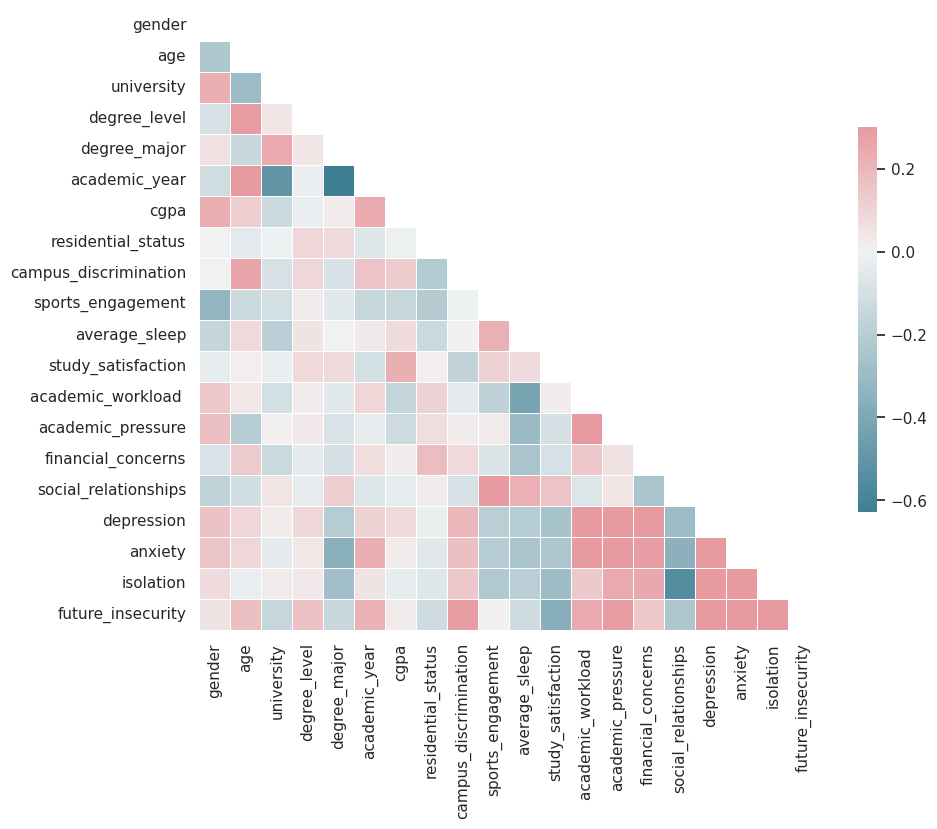

In [24]:
df_en = df_en.drop('stress_relief_activities', axis = 1)
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = df_en.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Chisquare test to see the influence of data on depression levels
ft = df_en.drop('depression', axis=1)
def getCaqVal(ft):
    df_cross = pd.crosstab(df_en['depression'], df_en[ft])
    c_sq, p_val, df, data = stats.chi2_contingency(df_cross)
    return c_sq, p_val

chi = pd.DataFrame(columns=['variable', 'chisquare', 'pvalue'])
for n, a in enumerate([a for a in df_en.columns if a != ['depression']]):
    chisq, pval = getCaqVal(a)
    pdData = [a, chisq, pval]
    chi.loc[n] = (a, chisq, pval)

chi['conclusion'] = np.where(chi.pvalue < 0.05, 'significant effect', 'no significant effect')
chi

,variable,chisquare,pvalue,conclusion
0,gender,9.127040,5.800135e-02,no significant effect
1,age,26.092952,5.679352e-01,no significant effect
2,university,46.440046,4.756728e-02,significant effect
3,degree_level,2.299286,6.808991e-01,no significant effect
4,degree_major,17.133051,1.446606e-01,no significant effect
5,academic_year,20.030015,6.652030e-02,no significant effect
6,cgpa,15.253082,7.617477e-01,no significant effect
7,residential_status,1.906877,7.528816e-01,no significant effect
8,campus_discrimination,12.341764,1.498279e-02,significant effect
9,sports_engagement,25.036575,1.465050e-02,significant effect


In [26]:
df_ft = df_en.drop(['gender', 'age', 'degree_level', 'degree_major', 'academic_year', 'residential_status'], axis=1)

In [27]:
# Chisquare test to see the influence of data on depression levels after feature selection
def getCaqVal(ft):
    df_cross = pd.crosstab(df_ft['depression'], df_ft[ft])
    c_sq, p_val, df, data = stats.chi2_contingency(df_cross)
    return c_sq, p_val

chi = pd.DataFrame(columns=['variable', 'chisquare', 'pvalue'])
for n, a in enumerate([a for a in df_ft.columns if a != ['depression']]):
    chisq, pval = getCaqVal(a)
    pdData = [a, chisq, pval]
    chi.loc[n] = (a, chisq, pval)

chi['conclusion'] = np.where(chi.pvalue < 0.05, 'significant effect', 'no significant effect')
chi

,variable,chisquare,pvalue,conclusion
0,university,46.440046,4.756728e-02,significant effect
1,cgpa,15.253082,7.617477e-01,no significant effect
2,campus_discrimination,12.341764,1.498279e-02,significant effect
3,sports_engagement,25.036575,1.465050e-02,significant effect
4,average_sleep,7.812874,4.519595e-01,no significant effect
5,study_satisfaction,20.943530,1.806915e-01,no significant effect
6,academic_workload,25.899703,1.109008e-02,significant effect
7,academic_pressure,28.225294,2.971482e-02,significant effect
8,financial_concerns,38.897027,1.125456e-03,significant effect
9,social_relationships,33.337934,6.664262e-03,significant effect


<ipython-input-28-db35b5730ce0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variable', y='chisquare', data=top_10_influential, palette='viridis')


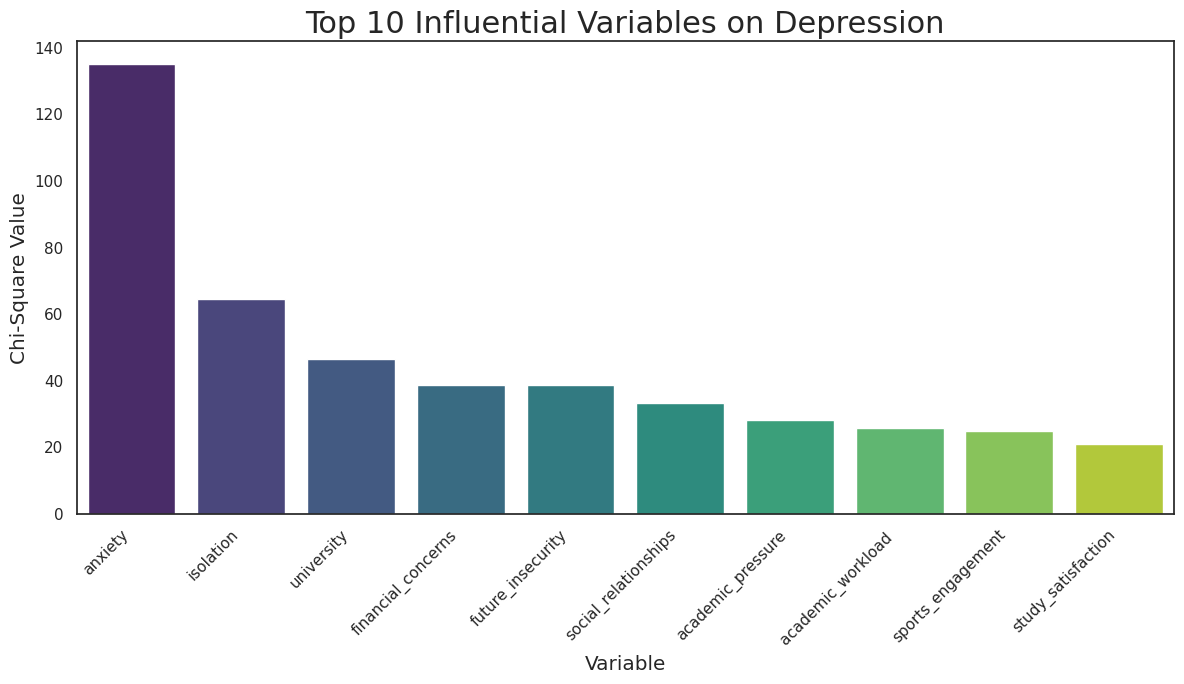

In [28]:
# Sort the causes of depression based on chi-square value
top_10_influential = chi.sort_values('chisquare', ascending=False).iloc[1:11]

plt.figure(figsize=(12, 7))
sns.barplot(x='variable', y='chisquare', data=top_10_influential, palette='viridis')
plt.xlabel('Variable', horizontalalignment="center", fontstyle="normal", fontsize="large", fontfamily="sans-serif")
plt.ylabel('Chi-Square Value', horizontalalignment="center", fontstyle="normal", fontsize="large", fontfamily="sans-serif")
plt.title('Top 10 Influential Variables on Depression', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.xticks(rotation=45, horizontalalignment="right")
plt.tight_layout()
plt.show()

## **REGRESSION**

In [29]:
# Define dependent and independent variables
y = df_ft['depression']
X = df_ft.drop('depression', axis=1)

# Fit the ordered logit model
mod = om.OrderedModel(y, X, distr='logit')
res = mod.fit(method='bfgs')
print(res.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 0.746399
         Iterations: 54
         Function evaluations: 56
         Gradient evaluations: 56
                             OrderedModel Results                             
Dep. Variable:             depression   Log-Likelihood:                -64.937
Model:                   OrderedModel   AIC:                             163.9
Method:            Maximum Likelihood   BIC:                             205.8
Date:                Sat, 31 Aug 2024                                         
Time:                        14:49:17                                         
No. Observations:                  87                                         
Df Residuals:                      70                                         
Df Model:                          13                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [30]:
# Odds Ratio ordered logit model
print(np.exp(res.params))

# Calculate McFadden's pseudo R-squared
null_model = om.OrderedModel(y, None, distr='logit')
null_res = null_model.fit(method='bfgs')
mcfadden_rsquared = 1 - (res.llf / null_res.llf)
print("McFadden's Pseudo R-squared:", mcfadden_rsquared)

university               1.364778e+00
cgpa                     1.541644e+00
campus_discrimination    1.551792e+00
sports_engagement        8.886556e-01
average_sleep            2.718018e+00
study_satisfaction       8.353418e-01
academic_workload        2.428202e+00
academic_pressure        1.406270e+00
financial_concerns       2.013489e+00
social_relationships     1.779407e+00
anxiety                  7.208642e+00
isolation                3.143469e+00
future_insecurity        1.376553e+00
1/2                      2.653157e+08
2/3                      2.748197e+00
3/4                      3.206236e+00
4/5                      3.597632e+00
dtype: float64
Optimization terminated successfully.
         Current function value: 1.591367
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
McFadden's Pseudo R-squared: 0.5309699021402348


/usr/local/lib/python3.10/dist-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


## **CLASSIFICATION**

In [31]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42

X_train, X_test, y_train, y_test = train_test_split(
      df_ft.drop('depression', axis=1),
      df_ft['depression'],
      test_size = 0.3,
      stratify = df_ft['depression'],
      shuffle = True,
      random_state = seed)

In [32]:
# LOGISTIC REGRESSION
logreg = LogisticRegression(max_iter=100000, random_state=seed)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("Akurasi Logistic Regression:", accuracy)
print("Recall Logistic Regression:", recall)

Akurasi Logistic Regression: 0.3333333333333333
Recall Logistic Regression: 0.34047619047619043


In [33]:
# K-NEAREST NEIGHBORS
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model performance evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("Akurasi KNN:", accuracy)
print("Recall KNN:", recall)

Akurasi KNN: 0.48148148148148145
Recall KNN: 0.4976190476190476


In [34]:
# DECISSION TREE
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model performance evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Decision Tree:", accuracy_dt)

Akurasi Decision Tree: 0.6666666666666666


## **ONE HOT ENCODING**

In [35]:
df_enc = df.copy().drop('stress_relief_activities', axis = 1)

In [36]:
df_enc

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,4-6 hrs,5,4,5,4,3,2,1,1,2
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,4-6 hrs,5,4,4,1,3,3,3,3,4
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,2-4 hrs,5,5,5,3,4,2,3,3,1
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,4-6 hrs,3,5,4,4,1,5,5,5,3
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,4-6 hrs,3,5,5,2,3,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,7-8 hrs,4,3,1,4,4,2,3,1,2
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,2-4 hrs,5,5,5,5,1,5,5,5,5
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,4-6 hrs,5,4,2,4,3,1,2,1,1
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,4-6 hrs,3,3,3,3,2,3,4,4,5


In [37]:
# Encoding categorical data and replace depression to binary data
df_enc['depression'] = df_enc['depression'].apply(lambda x: 0 if x <= 3 else 1)
one_hot_encoded_data = pd.get_dummies(df_enc, columns = df_enc.select_dtypes('object').columns)
df_enc = one_hot_encoded_data
df_enc

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,gender_Female,gender_Male,university_COMSATS,university_FAST,university_KUST,university_NUST,university_PU,university_UET,university_UMT,university_UOL,university_VU,degree_level_Postgraduate,degree_level_Undergraduate,degree_major_Computer Science,degree_major_Data Science,degree_major_Information Technology,degree_major_Software Engineering,academic_year_1st year,academic_year_2nd year,academic_year_3rd year,academic_year_4th year,cgpa_0.0-0.0,cgpa_1.5-2.0,cgpa_2.0-2.5,cgpa_2.5-3.0,cgpa_3.0-3.5,cgpa_3.5-4.0,residential_status_Off-Campus,residential_status_On-Campus,campus_discrimination_No,campus_discrimination_Yes,sports_engagement_1-3 times,sports_engagement_4-6 times,sports_engagement_7+ times,sports_engagement_No Sports,average_sleep_2-4 hrs,average_sleep_4-6 hrs,average_sleep_7-8 hrs
0,20,5,4,5,4,3,0,1,1,2,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False
1,20,5,4,4,1,3,0,3,3,4,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True,False
2,20,5,5,5,3,4,0,3,3,1,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False
3,20,3,5,4,4,1,1,5,5,3,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,True,False
4,20,3,5,5,2,3,1,5,4,4,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,22,4,3,1,4,4,0,3,1,2,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True
83,22,5,5,5,5,1,1,5,5,5,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False
84,21,5,4,2,4,3,0,2,1,1,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False
85,22,3,3,3,3,2,0,4,4,5,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False


In [38]:
# Rename False-True to 0-1
df_enc = df_enc.replace({False: 0, True: 1})
df_enc.head(5)

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,gender_Female,gender_Male,university_COMSATS,university_FAST,university_KUST,university_NUST,university_PU,university_UET,university_UMT,university_UOL,university_VU,degree_level_Postgraduate,degree_level_Undergraduate,degree_major_Computer Science,degree_major_Data Science,degree_major_Information Technology,degree_major_Software Engineering,academic_year_1st year,academic_year_2nd year,academic_year_3rd year,academic_year_4th year,cgpa_0.0-0.0,cgpa_1.5-2.0,cgpa_2.0-2.5,cgpa_2.5-3.0,cgpa_3.0-3.5,cgpa_3.5-4.0,residential_status_Off-Campus,residential_status_On-Campus,campus_discrimination_No,campus_discrimination_Yes,sports_engagement_1-3 times,sports_engagement_4-6 times,sports_engagement_7+ times,sports_engagement_No Sports,average_sleep_2-4 hrs,average_sleep_4-6 hrs,average_sleep_7-8 hrs
0,20,5,4,5,4,3,0,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0
1,20,5,4,4,1,3,0,3,3,4,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,20,5,5,5,3,4,0,3,3,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
3,20,3,5,4,4,1,1,5,5,3,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
4,20,3,5,5,2,3,1,5,4,4,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0


In [39]:
# Chisquare test to see the influence of data on depression levels after feature selection
def getCaqVal(ft):
    df_cross = pd.crosstab(df_enc['depression'], df_enc[ft])
    c_sq, p_val, df, data = stats.chi2_contingency(df_cross)
    return c_sq, p_val

chi = pd.DataFrame(columns=['variable', 'chisquare', 'pvalue'])
for n, a in enumerate([a for a in df_enc.columns if a != ['depression']]):
    chisq, pval = getCaqVal(a)
    pdData = [a, chisq, pval]
    chi.loc[n] = (a, chisq, pval)

chi['conclusion'] = np.where(chi.pvalue < 0.05, 'significant effect', 'no significant effect')
chi

,variable,chisquare,pvalue,conclusion
0,age,7.096423,4.189099e-01,no significant effect
1,study_satisfaction,6.396053,1.714588e-01,no significant effect
2,academic_workload,9.491109,2.342613e-02,significant effect
3,academic_pressure,10.620441,3.117777e-02,significant effect
4,financial_concerns,20.076493,4.823308e-04,significant effect
5,social_relationships,14.210858,6.651620e-03,significant effect
6,depression,83.003708,8.189962e-20,significant effect
7,anxiety,43.550842,7.952822e-09,significant effect
8,isolation,32.724844,1.359880e-06,significant effect
9,future_insecurity,21.063283,3.076503e-04,significant effect


## **CLASSIFICATION AND REGRESSION WITH ONE HOT ENCODING DATA**

In [40]:
# Split data to training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42

X_train, X_test, y_train, y_test = train_test_split(
      df_enc.drop('depression', axis=1),
      df_enc['depression'],
      test_size = 0.2,
      stratify = df_enc['depression'],
      shuffle = True,
      random_state = seed)

In [41]:
# DECISSION TREE
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model performance evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Decision Tree:", accuracy_dt)

Akurasi Decision Tree: 0.4444444444444444


In [42]:
# K-NEAREST NEIGHBORS
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model performance evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("Akurasi KNN:", accuracy)
print("Recall KNN:", recall)

Akurasi KNN: 0.8888888888888888
Recall KNN: 0.875


In [43]:
# BINARY LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# Logistic Regression model initialization
logreg = LogisticRegression(max_iter=100000, random_state=seed)

# Train the model with training data
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print("Akurasi Logistic Regression:", accuracy)
print("Recall Logistic Regression:", recall)

Akurasi Logistic Regression: 0.7222222222222222
Recall Logistic Regression: 0.7


In [44]:
logreg = LogisticRegression(random_state=42)

# fit the model with data
result = logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Display coefficients and intercept
print("Coefficients:", result.coef_)
print("Intercept:", result.intercept_)

# Model Evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Coefficients: [[ 0.07949183  0.29977083  0.65309616  0.74330138  0.64503526  0.29854685
   1.21281781  0.84074444  0.6572293   0.69427822 -0.69443954  0.13983908
  -0.28249897  0.09062532 -0.04252722 -0.0902612   0.089494    0.21832058
  -0.00537921 -0.11777371  0.00393147 -0.0040928  -0.24793448  0.25141525
   0.08835988 -0.09200197  0.31293747 -0.44434294 -0.02352999  0.15477412
  -0.29903808  0.24649376 -0.49138413 -0.33447394  0.57009419  0.30814688
  -0.11898686  0.11882553 -0.01616796  0.01600663 -0.79326282 -0.05192177
  -0.030312    0.87533526 -0.29669838 -0.39055496  0.68709201]]
Intercept: [-20.5657524]
Accuracy: 0.7222222222222222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
coefficients = result.coef_[0]
intercept = result.intercept_[0]

# Create a DataFrame of coefficient regression
df_params = pd.DataFrame({
    'Feature': ['Intercept'] + X_train.columns.tolist(),
    'Coefficient': [intercept] + coefficients.tolist()
})

df_params

,Feature,Coefficient
0,Intercept,-20.565752
1,age,0.079492
2,study_satisfaction,0.299771
3,academic_workload,0.653096
4,academic_pressure,0.743301
5,financial_concerns,0.645035
6,social_relationships,0.298547
7,anxiety,1.212818
8,isolation,0.840744
9,future_insecurity,0.657229


In [46]:
# Create odds ratio for data interpretation
odds_ratios = np.exp(result.coef_)
odds_ratios_df = pd.DataFrame(odds_ratios, columns=[f"Feature_{i}" for i in range(odds_ratios.shape[1])])
odds_ratios_df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46
0,1.082737,1.349549,1.921481,2.102866,1.906054,1.347899,3.362947,2.318092,1.929439,2.002263,0.499354,1.150089,0.753897,1.094859,0.958364,0.913692,1.093621,1.243986,0.994635,0.888897,1.003939,0.995916,0.780411,1.285844,1.092381,0.912103,1.367436,0.641245,0.976745,1.167394,0.741531,1.279531,0.611779,0.715714,1.768434,1.360901,0.887819,1.126173,0.983962,1.016135,0.452366,0.949403,0.970143,2.39968,0.743268,0.676681,1.987926


In [47]:
odds_ratios_df.transpose()

,0
Feature_0,1.082737
Feature_1,1.349549
Feature_2,1.921481
Feature_3,2.102866
Feature_4,1.906054
Feature_5,1.347899
Feature_6,3.362947
Feature_7,2.318092
Feature_8,1.929439
Feature_9,2.002263
